(300, 2)


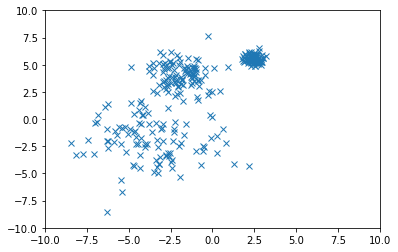

In [3]:
import numpy
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib

mean_1 = [-2.0,4.0]
mean_2 = [-3.5,-2.0]
mean_3 = [2.5,5.5]

cov_1 = [[1,0],
         [0,1]]
cov_2 = [[4,0],
         [0,4]]
cov_3 = [[0.1,0],
         [0,0.1]]
samples = 100

dataset_1 = [numpy.random.multivariate_normal(mean_1,cov_1) for i in range(samples)]
dataset_2 = [numpy.random.multivariate_normal(mean_2,cov_2) for i in range(samples)]
dataset_3 = [numpy.random.multivariate_normal(mean_3,cov_3) for i in range(samples)]
dataset_total = numpy.concatenate((dataset_1, dataset_2, dataset_3))
print(dataset_total.shape)
plt.plot(dataset_total[:,0],dataset_total[:,1],'x')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

In [5]:
# Parameters

MAX_NUMBER_OF_CLUSTERS = 20
V0 = 0.
B0 = 1.0 
M0 = 0.
A0 = 1.0

# Try to find a Bayesian Formulation of the clustering algorithm

Try to find:

$$P(Z|X) = \frac{P(X|Z)P(Z)}{P(X)}$$

where:

$$ P(X) = \int P(X|Z)P(Z) dZ $$


In [8]:
from scipy.stats import multivariate_normal as mvn

def covariancef(X,Y,mean_x,mean_y,N):
    sum = 0.0
    j = 0
    for x,y in zip(X,Y):
        sum += ((x - mean_x)*(y - mean_y))
        j += 1
    return sum/N

def update_q_z(X, Z, pi, mean, covariance):
    qz_val = numpy.zeros(shape=(MAX_NUMBER_OF_CLUSTERS))
    for i in range(MAX_NUMBER_OF_CLUSTERS):
        for j in range(samples):
            qz_val[i] += z[i,j] * ( - 0.5 * numpy.log(covariance[i,:]) - 0.5 * numpy.square( X[j,:] - mean[i,:]) + numpy.log(pi[i])) 
            
    return qz_val

def update_q_pi(Z, pi):
    q_pi_val = numpy.zeros(shape=(MAX_NUMBER_OF_CLUSTERS))
    
    for i in range(MAX_NUMBER_OF_CLUSTERS):
        for j in range(samples):
            q_pi_val[i] += z[i,j]  + (A0 - 1)
        q_pi_val[i] *= numpy.log(pi[i])
    return q_pi_val

def update_q_mu_sigma(X,Z,W, mean, covariance):
    q_mu_sigma_val = numpy.zeros(shape=(MAX_NUMBER_OF_CLUSTERS))

    for i in range(MAX_NUMBER_OF_CLUSTERS):
        for j in range(samples):
            q_mu_sigma_val[i] += z[i,j] * ( - 0.5 * numpy.log(covariance[i,:]) - 0.5 * numpy.square( X[j,:] - mean[i, :]))
    return q_mu_sigmal_val
            

In [ ]:
mean_expec = numpy.zeros(shape=(MAX_NUMBER_OF_CLUSTERS,dataset_total.shape[0],2))
var_expec = numpy.zeros(shape=(MAX_NUMBER_OF_CLUSTERS,dataset_total.shape[0],2))